# ----------------------------------------------REPORTS--------------------------------------------------

# Logistics Database

In [81]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

dat = sqlite3.connect('mydb.db')
query = dat.execute("SELECT * From order_db")
cols = [column[0] for column in query.description]
results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
results

,order_id,User_Name,Product,Quantity,Shipment,Pick_from,Destination,Ship_date,Created_at
0,1,Harini,PRINTER HD,10,flight,Canada,India,2021-12-23,2021-12-16
1,2,keerthyraaj,ROSE WOOD BED,2,flight,India,Canada,2021-12-21,2021-12-16
2,3,keerthyraaj,XEROX MACHINE,4,ship,USA,UK,2021-12-26,2021-12-16
3,4,keerthyraaj,XEROX MACHINE,5,flight,Mexico,India,2021-12-23,2021-12-16
4,5,keerthyraaj,ROSE WOOD BED,6,ship,Canada,USA,2021-12-24,2021-12-16
5,6,keerthyraaj,ROSE WOOD BED,3,flight,USA,India,2021-12-18,2021-12-16
6,7,Harini,TEAKWOOD TABLE SET,4,ship,Canada,India,2021-12-25,2021-12-16
7,8,Harini,TEAKWOOD TABLE SET,4,truck,Canada,Canada,2021-12-19,2021-12-16
8,9,Harini,ROSE WOOD BED,2,flight,Canada,USA,2021-12-23,2021-12-16
9,10,Harini,XEROX MACHINE,2,train,Canada,Canada,2021-12-23,2021-12-16


# REPORT - 1

# This report shows the total Products ordered by every User. 

In [82]:
Report_1 = pd.DataFrame(results.groupby(['User_Name','Product'])['Quantity'].sum())
Report_1

Quantity
User_Name   Product                     
Harini      PRINTER HD                12
            ROSE WOOD BED              2
            TEAKWOOD TABLE SET         8
            XEROX MACHINE              2
Islamiyat   PRINTER HD                11
            ROSE WOOD BED              2
            TEAKWOOD TABLE SET         1
            XEROX MACHINE              5
Shuwen      PRINTER HD                 5
            ROSE WOOD BED              4
            TEAKWOOD TABLE SET         9
            XEROX MACHINE              9
Toshimi     ROSE WOOD BED              1
            TEAKWOOD TABLE SET         9
            XEROX MACHINE              4
keerthyraaj ROSE WOOD BED             11
            XEROX MACHINE              9

# REPORT - 2

# This report shows the total Shipments done by every User.

In [83]:
Report_2 = pd.DataFrame(results.groupby(['User_Name','Shipment'])['Shipment'].count())
Report_2

Shipment
User_Name   Shipment          
Harini      flight           3
            ship             1
            train            1
            truck            1
Islamiyat   flight           1
            ship             2
            train            1
            truck            1
Shuwen      flight           1
            ship             1
            train            1
            truck            2
Toshimi     flight           2
            ship             1
            train            1
            truck            1
keerthyraaj flight           3
            ship             2

# REPORT - 3

# This report shows the total Shipments done for every Product.

In [84]:
Report_3 = pd.DataFrame(results.groupby(['Product','Shipment'])['Quantity'].sum())
Report_3

Quantity
Product            Shipment          
PRINTER HD         flight          12
                   ship            13
                   truck            3
ROSE WOOD BED      flight          10
                   ship             6
                   train            3
                   truck            1
TEAKWOOD TABLE SET flight           9
                   ship            11
                   truck            7
XEROX MACHINE      flight           7
                   ship             4
                   train            9
                   truck            9

# REPORT - 4

# This report shows the Best Products

In [85]:
Report_4 = results.groupby('Product')['Quantity'].agg(['sum'])
Report_4 = Report_4.rename(columns={"sum": "Total Products"})
Report_4 = Report_4. sort_values("Total Products", ascending= False)
Report_4

,Total Products
Product,
XEROX MACHINE,29
PRINTER HD,28
TEAKWOOD TABLE SET,27
ROSE WOOD BED,20


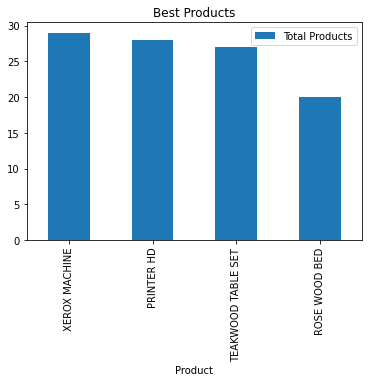

In [86]:
Report_4 = Report_4.reset_index(level=['Product'])
dataFrame = pd.DataFrame(data=Report_4);
dataFrame.plot.bar(x="Product", y="Total Products",  title="Best Products");
plt.show();

# REPORT - 5

# This report shows the Best Shipments

In [87]:
Report_5 = results.groupby('Shipment')['Shipment'].agg(['count'])
Report_5 = Report_5.rename(columns={"count": "Count"})
Report_5 = Report_5. sort_values("Count", ascending= False)
Report_5

,Count
Shipment,
flight,10
ship,7
truck,5
train,4


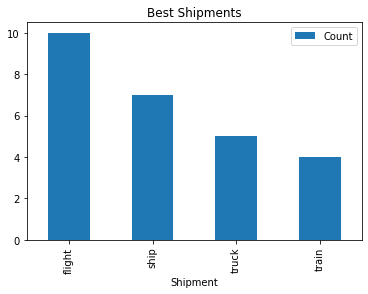

In [88]:
Report_5 = Report_5.reset_index(level=['Shipment'])
dataFrame = pd.DataFrame(data=Report_5);
dataFrame.plot.bar(x="Shipment", y="Count",  title="Best Shipments");
plt.show();

# REPORT - 6

# This report shows the Best Destination

In [89]:
Report_6 = results.groupby('Destination')['Destination'].agg(['count'])
Report_6 = Report_6.rename(columns={"count": "Count"})
Report_6 = Report_6. sort_values("Count", ascending= False)
Report_6

,Count
Destination,
Canada,11
India,6
USA,5
UK,3
Mexico,1


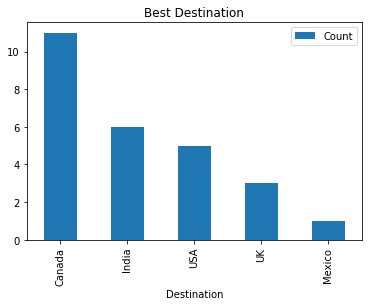

In [90]:
Report_6 = Report_6.reset_index(level=['Destination'])
dataFrame = pd.DataFrame(data=Report_6);
dataFrame.plot.bar(x="Destination", y="Count",  title="Best Destination");
plt.show();

# REPORT - 7

# This report shows the Best Pickup Destination

In [91]:
Report_7 = results.groupby('Pick_from')['Pick_from'].agg(['count'])
Report_7 = Report_7.rename(columns={"count": "Count"})
Report_7 = Report_7. sort_values("Count", ascending= False)
Report_7

,Count
Pick_from,
Canada,11
India,4
Mexico,4
USA,4
UK,3


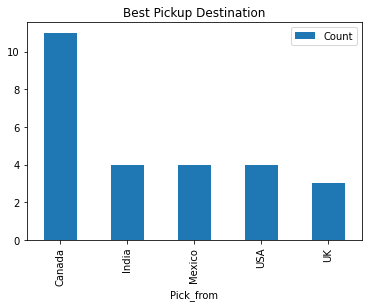

In [92]:
Report_7 = Report_7.reset_index(level=['Pick_from'])
dataFrame = pd.DataFrame(data=Report_7);
dataFrame.plot.bar(x="Pick_from", y="Count",  title="Best Pickup Destination");
plt.show();